In [4]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
time_list = []
model_list = []
batch = []
char_size = []
for BS in [16,32,64]:
    for CS in [3,6,12]:
        with open(f'log_time_cnn_rnn_char_BS_{str(BS)}_char_size_{str(CS)}.txt', 'r') as f:
            for ind, line in enumerate(f):
                if ind == 0:
                    continue
                else:
                    time_list = time_list + line.strip().split(', ')
                    model_list = model_list + ['Char-CNN', 'Char-BiGRU']
                    batch = batch + [str(BS)]*2
                    char_size = char_size + [str(CS)]*2
time_list = [float(i.strip()) for i in time_list]
DF = pd.DataFrame({'time_per_batch': time_list, 'Model': model_list, 'Batch_size': batch, 'Char_size': char_size})

AttributeError: 'NoneType' object has no attribute 'remove'

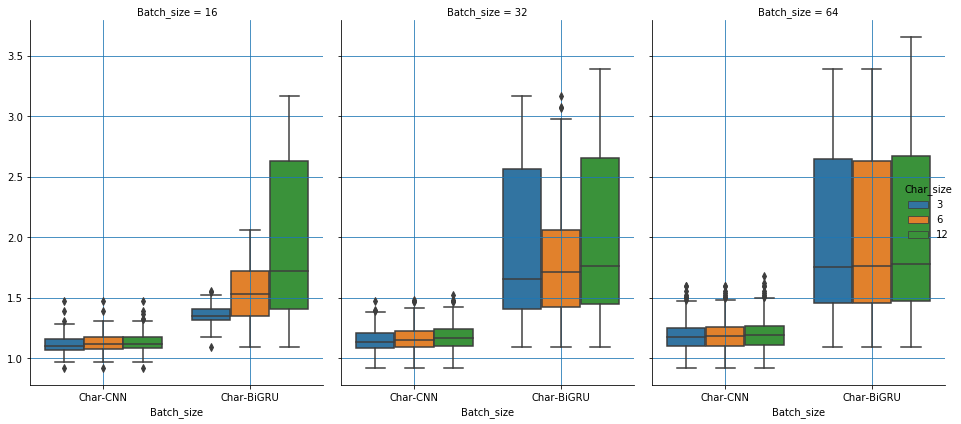

In [15]:
g = sns.catplot(x="Model", y="time_per_batch",hue="Char_size", col="Batch_size",data=DF, kind="box",hue_order=['3','6','12'],height=6, aspect=.7)
g = g.map(plt.grid, "Batch_size")
plt.gca().get_legend().remove()
plt.legend(loc='upper left')
